In [6]:
import pandas as pd

# Load the dataset
file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows
print(data.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [8]:
data['Income'].fillna(data['Income'].median(), inplace=True)


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['Education', 'Marital_Status', 'Dt_Customer']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display the first few rows after preprocessing
print(data.head())


/Users/ktlkr/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   
4  5324        1981          4               3  58293.0        1         0   

   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0           80       58       635  ...                  7             0   
1          157       38        11  ...                  5             0   
2          444       26       426  ...                  4             0   
3          199       26        11  ...                  6             0   
4          390       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        

In [12]:
from sklearn.preprocessing import StandardScaler

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the first few rows after scaling
print(data.head())


         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.020999   -0.985345  -0.350141        0.251004  0.235696 -0.825218   
1 -1.053058   -1.235733  -0.350141        0.251004 -0.235454  1.032559   
2 -0.447070   -0.317643  -0.350141        1.180340  0.773999 -0.825218   
3  0.181716    1.268149  -0.350141        1.180340 -1.022355  1.032559   
4 -0.082614    1.017761   1.428354       -0.678332  0.241888  1.032559   

   Teenhome  Dt_Customer   Recency  MntWines  ...  NumWebVisitsMonth  \
0 -0.929894    -1.303763  0.307039  0.983781  ...           0.693904   
1  0.906934    -0.898762 -0.383664 -0.870479  ...          -0.130463   
2 -0.929894     0.610786 -0.798086  0.362723  ...          -0.542647   
3 -0.929894    -0.677853 -0.798086 -0.870479  ...           0.281720   
4 -0.929894     0.326760  1.550305 -0.389085  ...          -0.130463   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0      -0.28014      -0.28383      -0.28014    

In [14]:
from sklearn.cluster import DBSCAN

# Define DBSCAN parameters
eps = 0.5  # Maximum distance between two samples for one to be considered as in the neighborhood of the other.
min_samples = 5  # Minimum number of samples in a neighborhood for a point to be considered as a core point.

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(data[numeric_columns])

# Display the number of points in each cluster
print(data['Cluster'].value_counts())

# Display the first few rows with cluster labels
print(data.head())


-1    2240
Name: Cluster, dtype: int64
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.020999   -0.985345  -0.350141        0.251004  0.235696 -0.825218   
1 -1.053058   -1.235733  -0.350141        0.251004 -0.235454  1.032559   
2 -0.447070   -0.317643  -0.350141        1.180340  0.773999 -0.825218   
3  0.181716    1.268149  -0.350141        1.180340 -1.022355  1.032559   
4 -0.082614    1.017761   1.428354       -0.678332  0.241888  1.032559   

   Teenhome  Dt_Customer   Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0 -0.929894    -1.303763  0.307039  0.983781  ...      -0.28014      -0.28383   
1  0.906934    -0.898762 -0.383664 -0.870479  ...      -0.28014      -0.28383   
2 -0.929894     0.610786 -0.798086  0.362723  ...      -0.28014      -0.28383   
3 -0.929894    -0.677853 -0.798086 -0.870479  ...      -0.28014      -0.28383   
4 -0.929894     0.326760  1.550305 -0.389085  ...      -0.28014      -0.28383   

   AcceptedCmp5  AcceptedCmp1

In [16]:
# Display the number of points in each cluster
print(data['Cluster'].value_counts())

# Display the first few rows with cluster labels
print(data.head())


-1    2240
Name: Cluster, dtype: int64
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.020999   -0.985345  -0.350141        0.251004  0.235696 -0.825218   
1 -1.053058   -1.235733  -0.350141        0.251004 -0.235454  1.032559   
2 -0.447070   -0.317643  -0.350141        1.180340  0.773999 -0.825218   
3  0.181716    1.268149  -0.350141        1.180340 -1.022355  1.032559   
4 -0.082614    1.017761   1.428354       -0.678332  0.241888  1.032559   

   Teenhome  Dt_Customer   Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0 -0.929894    -1.303763  0.307039  0.983781  ...      -0.28014      -0.28383   
1  0.906934    -0.898762 -0.383664 -0.870479  ...      -0.28014      -0.28383   
2 -0.929894     0.610786 -0.798086  0.362723  ...      -0.28014      -0.28383   
3 -0.929894    -0.677853 -0.798086 -0.870479  ...      -0.28014      -0.28383   
4 -0.929894     0.326760  1.550305 -0.389085  ...      -0.28014      -0.28383   

   AcceptedCmp5  AcceptedCmp1

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

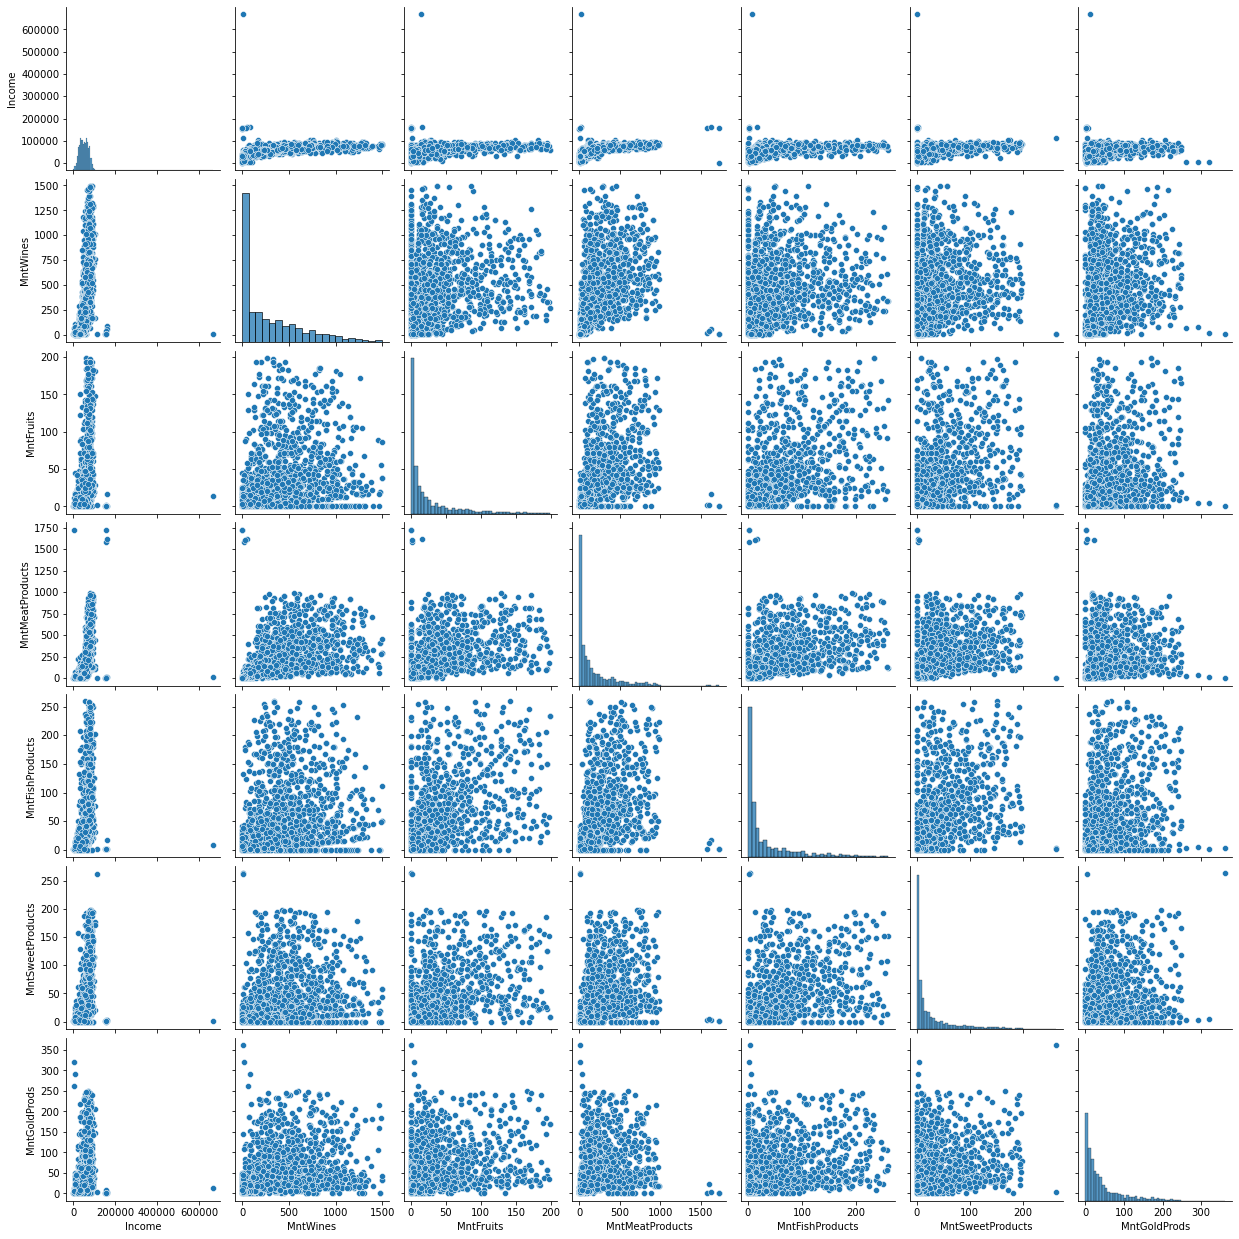

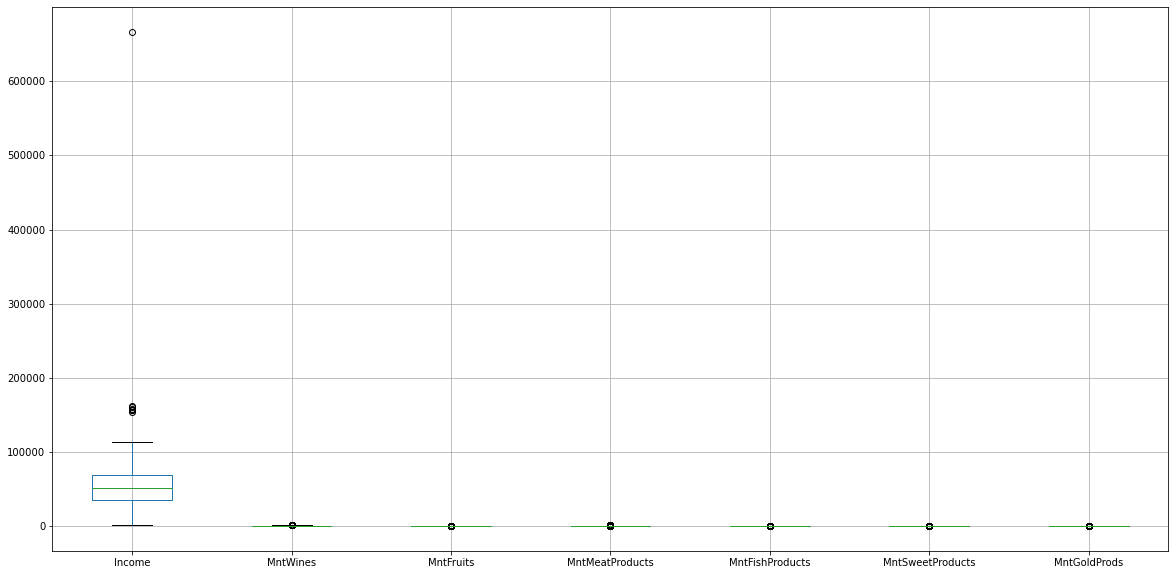

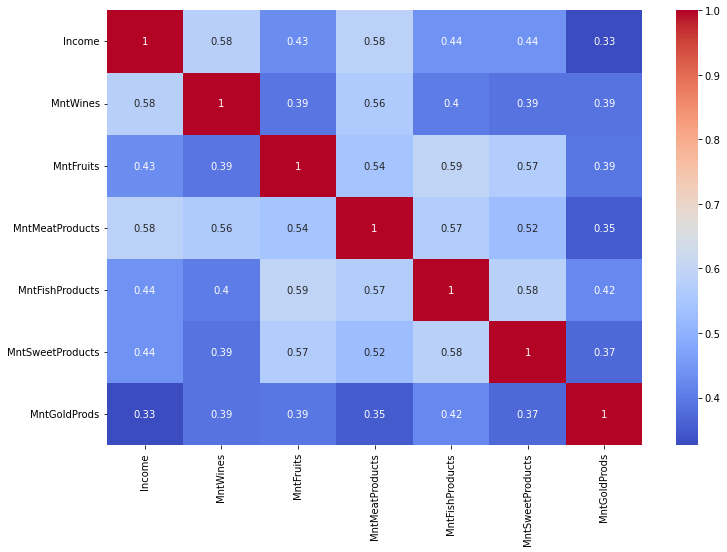

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Display basic statistics
print(data.describe())

# Display data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Scatter plot to visualize some relationships
sns.pairplot(data[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.show()

# Boxplots for distribution of numerical variables
plt.figure(figsize=(20, 10))
data[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].boxplot()
plt.show()

# Heatmap for correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(data[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values in the 'Income' column with the median value
data['Income'].fillna(data['Income'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Education', 'Marital_Status', 'Dt_Customer']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Standardize the features
from sklearn.preprocessing import StandardScaler

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


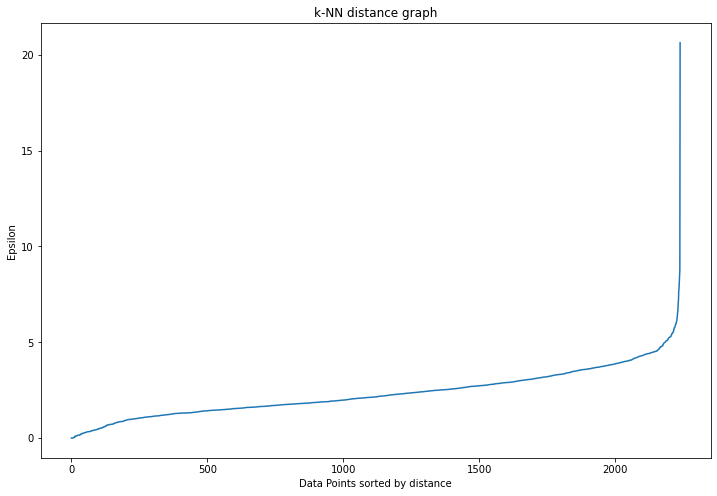

In [28]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Number of neighbors
k = 5

# Compute the k-nearest neighbors distances
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data[numeric_columns])
distances, indices = neighbors_fit.kneighbors(data[numeric_columns])

# Sort the distances (to plot the k-distance graph)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot the k-distance graph
plt.figure(figsize=(12, 8))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.title('k-NN distance graph')
plt.show()


In [30]:
# Adjust the eps value based on the k-NN distance graph
eps = 0.3  # Example value, adjust based on the graph
min_samples = 5  # Keep as default or adjust

# Reapply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(data[numeric_columns])

# Evaluate clustering quality
if len(set(data['Cluster'])) > 1:
    silhouette_avg = silhouette_score(data[numeric_columns], data['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("DBSCAN did not form multiple clusters. Adjust parameters and try again.")

# Display the number of points in each cluster
print(data['Cluster'].value_counts())

# Display the first few rows with cluster labels
print(data.head())


DBSCAN did not form multiple clusters. Adjust parameters and try again.
-1    2240
Name: Cluster, dtype: int64
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.020999   -0.985345  -0.350141        0.251004  0.235696 -0.825218   
1 -1.053058   -1.235733  -0.350141        0.251004 -0.235454  1.032559   
2 -0.447070   -0.317643  -0.350141        1.180340  0.773999 -0.825218   
3  0.181716    1.268149  -0.350141        1.180340 -1.022355  1.032559   
4 -0.082614    1.017761   1.428354       -0.678332  0.241888  1.032559   

   Teenhome  Dt_Customer   Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0 -0.929894    -1.303763  0.307039  0.983781  ...      -0.28014      -0.28383   
1  0.906934    -0.898762 -0.383664 -0.870479  ...      -0.28014      -0.28383   
2 -0.929894     0.610786 -0.798086  0.362723  ...      -0.28014      -0.28383   
3 -0.929894    -0.677853 -0.798086 -0.870479  ...      -0.28014      -0.28383   
4 -0.929894     0.326760  1.550305 -0.3

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np


In [36]:
# Load the dataset
file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Display basic statistics
print(data.describe())

# Display data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())


                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [38]:
# Fill missing values in the 'Income' column with the median value
data['Income'].fillna(data['Income'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Education', 'Marital_Status', 'Dt_Customer']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Standardize the features
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


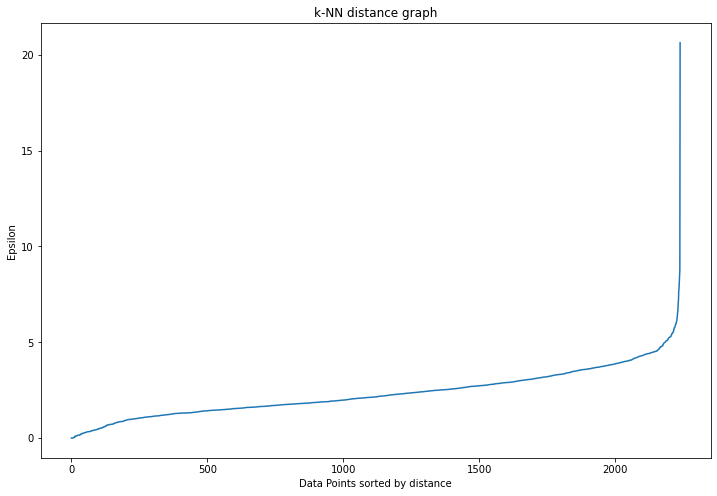

In [40]:
# Number of neighbors
k = 5

# Compute the k-nearest neighbors distances
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data[numeric_columns])
distances, indices = neighbors_fit.kneighbors(data[numeric_columns])

# Sort the distances (to plot the k-distance graph)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot the k-distance graph
plt.figure(figsize=(12, 8))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.title('k-NN distance graph')
plt.show()


In [42]:
# Adjust the eps value based on the k-NN distance graph
eps = 0.3  # Example value, adjust based on the graph
min_samples = 5  # Adjust as needed

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(data[numeric_columns])


-1    2240
Name: Cluster, dtype: int64
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.020999   -0.985345  -0.350141        0.251004  0.235696 -0.825218   
1 -1.053058   -1.235733  -0.350141        0.251004 -0.235454  1.032559   
2 -0.447070   -0.317643  -0.350141        1.180340  0.773999 -0.825218   
3  0.181716    1.268149  -0.350141        1.180340 -1.022355  1.032559   
4 -0.082614    1.017761   1.428354       -0.678332  0.241888  1.032559   

   Teenhome  Dt_Customer   Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0 -0.929894    -1.303763  0.307039  0.983781  ...      -0.28014      -0.28383   
1  0.906934    -0.898762 -0.383664 -0.870479  ...      -0.28014      -0.28383   
2 -0.929894     0.610786 -0.798086  0.362723  ...      -0.28014      -0.28383   
3 -0.929894    -0.677853 -0.798086 -0.870479  ...      -0.28014      -0.28383   
4 -0.929894     0.326760  1.550305 -0.389085  ...      -0.28014      -0.28383   

   AcceptedCmp5  AcceptedCmp1

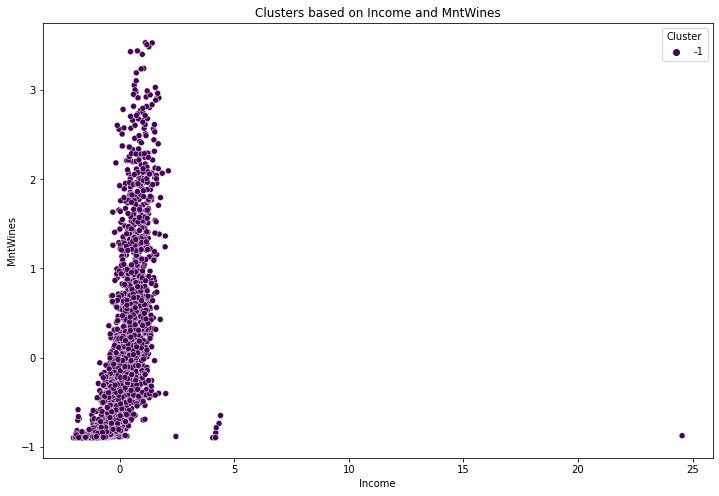

In [44]:
# Display the number of points in each cluster
print(data['Cluster'].value_counts())

# Display the first few rows with cluster labels
print(data.head())

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Income', y='MntWines', hue='Cluster', palette='viridis')
plt.title('Clusters based on Income and MntWines')
plt.show()


In [46]:
# Evaluate clustering quality
if len(set(data['Cluster'])) > 1:
    silhouette_avg = silhouette_score(data[numeric_columns], data['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("DBSCAN did not form multiple clusters. Adjust parameters and try again.")


DBSCAN did not form multiple clusters. Adjust parameters and try again.
